In [46]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [14]:
data_sensors_path = '../CTC - Data Sample Sensors (1).csv'
data_sensors = pd.read_csv(data_sensors_path, delimiter=',')

# Convert Timestamp column to datetime
data_sensors['date'] = pd.to_datetime(data_sensors['date'], errors='coerce', utc=True)
data_sensors['temperature'] = data_sensors['temperature'].astype(float)
data_sensors['decibel_milliwatt'] = data_sensors['decibel_milliwatt'].astype(float)
data_sensors['voltage_drain'] = data_sensors['voltage_drain'].astype(float)

data_sensors

,id,uuid,date,status,temperature,decibel_milliwatt,voltage_drain,modified_at,deleted,sensor_id
0,1,83757635-61ff-4f76-8ff8-01f5b6c60f01,2023-09-28 11:50:55+00:00,True,38.0,-113.0,3.013,NaN,False,1
1,2,c13da891-0a52-4723-b831-57f52087a655,2023-09-28 11:50:55+00:00,False,38.0,-113.0,3.013,NaN,False,1
2,3,d18316a7-82d0-4cbd-ba34-655bc0fdb2cb,2023-09-28 11:50:55+00:00,False,38.0,-113.0,3.013,NaN,False,1
3,4,7aa482dd-ce2d-4ff9-bf93-f4fc770e913b,2023-09-28 11:50:55+00:00,True,38.0,-113.0,3.013,NaN,False,1
4,5,8144601e-d3c0-4990-a233-16f3464e83dd,2024-09-25 10:24:24+00:00,False,0.0,85.0,3.628,NaN,False,5
...,...,...,...,...,...,...,...,...,...,...
30917,30918,97929ef5-4478-4e2b-9cff-cad4baa7f55e,2024-11-06 19:47:45+00:00,True,7.0,-61.0,3.522,NaN,False,35
30918,30919,7ea1fa92-390d-4b8e-a3ea-83bbef9ed9a0,2024-11-06 19:47:56+00:00,False,15.0,-65.0,3.378,NaN,False,35
30919,30920,c4447c2e-78ac-4a41-ab72-aec6c5117b20,2024-11-06 19:52:25+00:00,False,-3.0,-79.0,3.613,NaN,False,1
30920,30921,01fbd535-8f04-4343-a29c-1a644061c18d,2024-11-06 20:02:37+00:00,True,-6.0,-53.0,3.605,NaN,False,16


In [7]:
data_sensors_gouda_path = '../Sensor data Bucharest.csv'
data_sensors_bucharest = pd.read_csv(data_sensors_gouda_path, delimiter=',')

# Convert Timestamp column to datetime
data_sensors_bucharest['date'] = pd.to_datetime(data_sensors_bucharest['date'], errors='coerce', utc=True)
data_sensors_bucharest

,date,status,sensor id,location name,city name
0,2024-10-10 05:11:34+00:00,True,863213040205978,Veteranilor,Bucharest
1,2024-10-10 06:33:08+00:00,True,863213040219615,Veteranilor,Bucharest
2,2024-10-10 06:33:24+00:00,False,863213040219615,Veteranilor,Bucharest
3,2024-10-10 06:50:57+00:00,False,863213040204880,Veteranilor,Bucharest
4,2024-10-10 06:55:46+00:00,True,863213040219615,Veteranilor,Bucharest
...,...,...,...,...,...
54941,2025-09-22 13:11:12+00:00,True,863213040215126,Veteranilor,Bucharest
54942,2025-09-22 13:11:24+00:00,True,863213040198850,Cernișoara,Bucharest
54943,2025-09-22 13:11:50+00:00,False,863213040198850,Cernișoara,Bucharest
54944,2025-09-22 13:12:15+00:00,True,863213040219615,Veteranilor,Bucharest


In [51]:
#Code for checking the overlapping datapoints between the different smart zones in Bucharest
df = data_sensors_bucharest.copy()  
locations = ["Veteranilor", "Cernișoara", "Piața Orizont", "Piața Valea Ialomiței"]
MIN_ROWS_PER_DAY = 1   

df["date"] = pd.to_datetime(df["date"], utc=True, errors="coerce")

df = df[df["location name"].isin(locations)].copy()

df["day"] = df["date"].dt.floor("D")

counts = (
    df.groupby(["day", "location name"])
      .size()
      .unstack("location name")
      .reindex(columns=locations)      
      .fillna(0).astype(int)
)

mask_all_present = (counts >= MIN_ROWS_PER_DAY).all(axis=1)
days_all4 = counts.index[mask_all_present]

print("Number of days with data for all 4 smart zones:", mask_all_present.sum())

counts_all4 = counts.loc[mask_all_present].sort_index()
counts_all4.head()

Number of days with data for all 4 smart zones: 22


location name,Veteranilor,Cernișoara,Piața Orizont,Piața Valea Ialomiței
day,,,,
2025-09-01 00:00:00+00:00,166,522,10,23
2025-09-02 00:00:00+00:00,243,482,122,252
2025-09-03 00:00:00+00:00,151,472,143,261
2025-09-04 00:00:00+00:00,111,793,63,301
2025-09-05 00:00:00+00:00,247,969,84,258


In [52]:
#make groups based on the location names
data_bucharest_locations = data_sensors_bucharest.groupby("location name")

#get the seperate groups 
data_veteranilor = data_bucharest_locations.get_group("Veteranilor")
data_cernisoara = data_bucharest_locations.get_group("Cernișoara")
data_piata_orizont = data_bucharest_locations.get_group("Piața Orizont")
data_piata_valuea_ialomitei = data_bucharest_locations.get_group("Piața Valea Ialomiței")



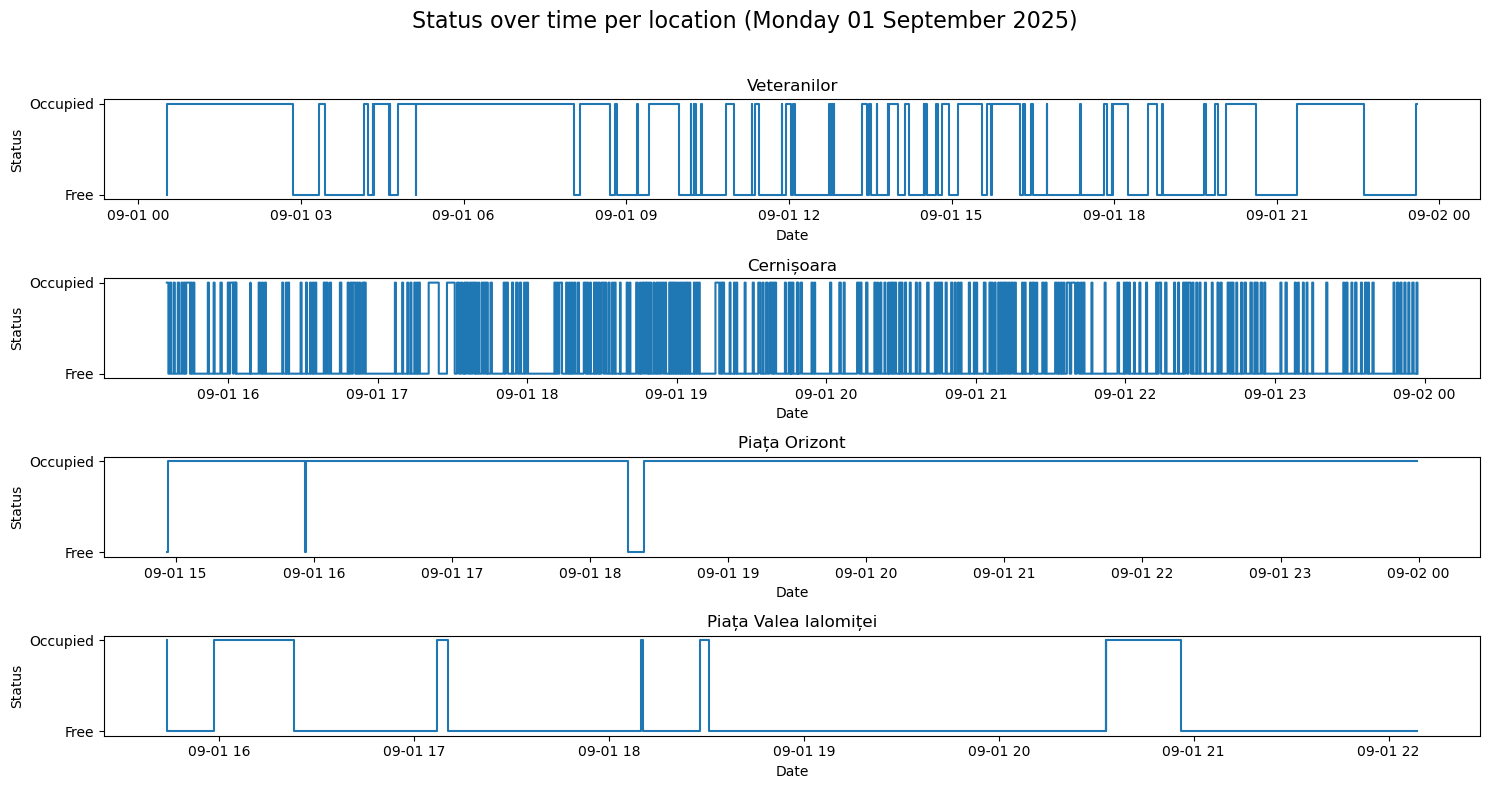

In [ ]:

start_date = "2025-09-01"
end_date = "2025-09-02"

date_obj = pd.to_datetime(start_date)

date_str = date_obj.strftime("%A %d %B %Y")

fig, axes = plt.subplots(4, 1, figsize=(15,8), sharey=True)

locations = {
    "Veteranilor": data_veteranilor,
    "Cernișoara": data_cernisoara,
    "Piața Orizont": data_piata_orizont,
    "Piața Valea Ialomiței": data_piata_valuea_ialomitei
}

axes = axes.flatten() 

for ax, (name, df) in zip(axes, locations.items()):
    mask = (df["date"] >= start_date) & (df["date"] < end_date)
    subset = df.loc[mask]

    ax.step(subset["date"], subset["status"], where="post")
    ax.set_title(name)
    ax.set_xlabel("Date")
    ax.set_yticks([0,1])
    ax.set_yticklabels(["Free", "Occupied"])

axes[0].set_ylabel("Status")
axes[1].set_ylabel("Status")
axes[2].set_ylabel("Status")
axes[3].set_ylabel("Status")

plt.suptitle(f"Status over time per location ({date_str})", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # ruimte laten voor suptitle
plt.show()